In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("../datasets/data_social_network_ads.csv")

In [18]:
df.shape

(400, 5)

In [19]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [21]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [22]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [24]:
categorical_cols = list(df.select_dtypes(include=["object"]).columns)
categorical_cols

['Gender']

In [25]:
df["Gender"]

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [27]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [28]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normalized_data = normalizer.fit_transform(df)

df = pd.DataFrame(normalized_data, columns=df.columns)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,0.232636,1.0,0.023810,0.029630,0.0
1,0.982732,1.0,0.404762,0.037037,0.0
2,0.409926,0.0,0.190476,0.207407,0.0
3,0.147083,0.0,0.214286,0.311111,0.0
4,0.954801,1.0,0.023810,0.451852,0.0
...,...,...,...,...,...
395,0.503623,0.0,0.666667,0.192593,1.0
396,0.560787,1.0,0.785714,0.059259,1.0
397,0.352477,0.0,0.761905,0.037037,1.0
398,0.757720,1.0,0.428571,0.133333,0.0


In [29]:
target = df["Purchased"].astype(int)
target

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [30]:
features = df.iloc[:, (df.columns != "Purchased") & (df.columns != "User ID")]
features

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852
...,...,...,...
395,0.0,0.666667,0.192593
396,1.0,0.785714,0.059259
397,0.0,0.761905,0.037037
398,1.0,0.428571,0.133333


In [31]:
features.shape

(400, 3)

In [32]:
target

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [33]:
feature_1 = features.index[0]

In [34]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
    features, target, test_size=0.2, random_state=42
)

In [35]:
print(train_x.shape, test_x.size, train_y.shape, test_y.size)

(320, 3) 240 (320,) 80


In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, solver="liblinear")
lr.fit(train_x, train_y)

LogisticRegression(C=1, solver='liblinear')

In [37]:
prediction = lr.predict(test_x)

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, prediction)
TP, FP, FN, TN = cm.ravel()

In [39]:
print(TP, FP)
print(FN, TN)

51 1
9 19


<Axes: >

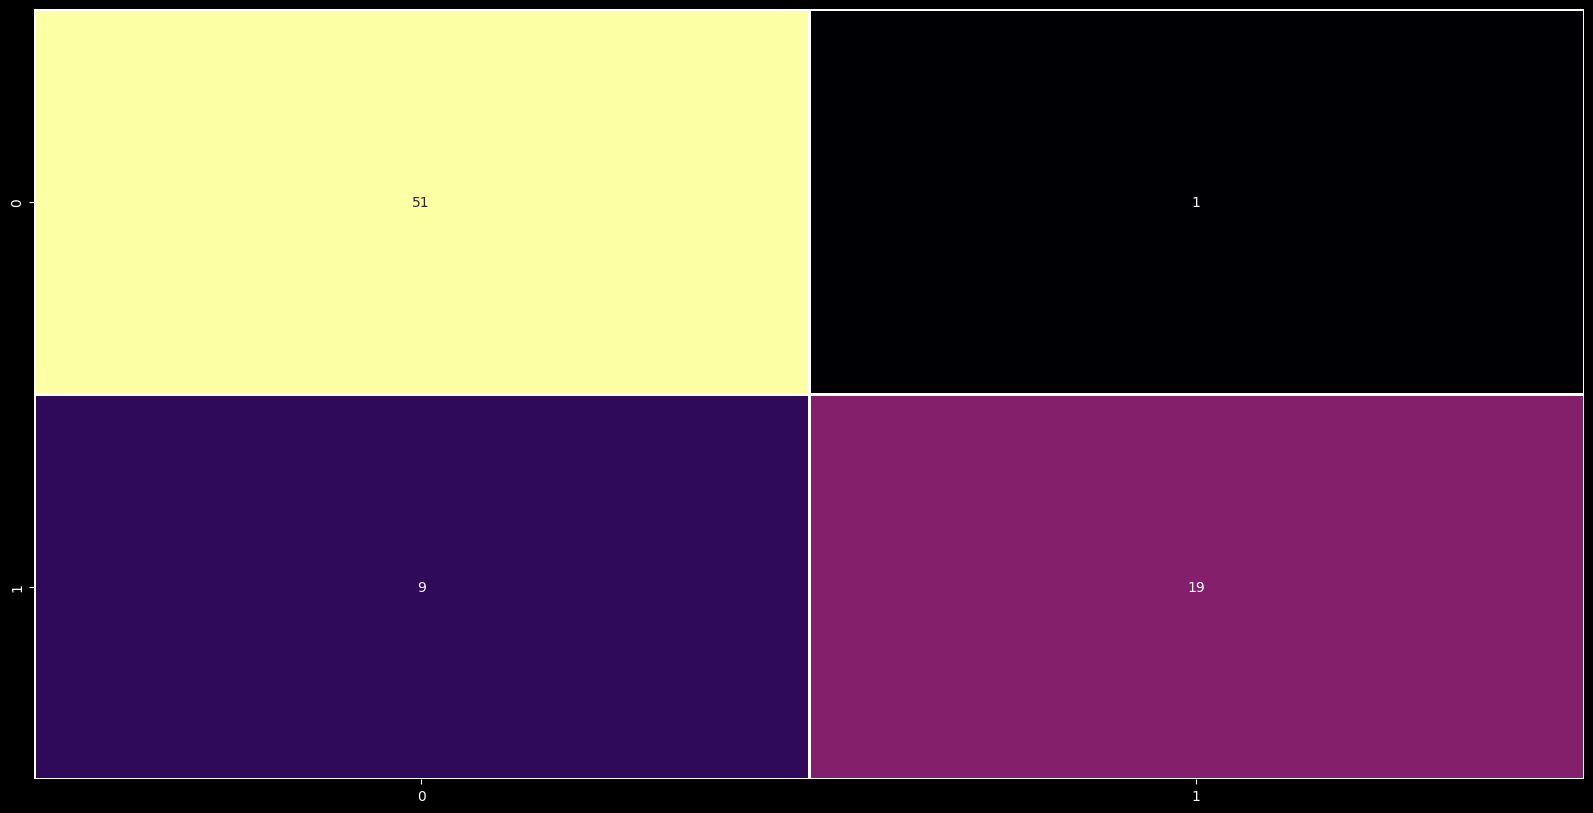

In [40]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    cm,
    cmap="inferno",
    annot=True,
    cbar=False,
    linecolor="white",
    linewidths=1,
)

In [41]:
prediction_proba = lr.predict_proba(test_x)

In [42]:
from sklearn.metrics import log_loss, jaccard_score

log_loss_val = log_loss(test_y, prediction_proba)
jaccard_score_ = jaccard_score(test_y, prediction)
print(log_loss_val, jaccard_score_)

0.34416686821536474 0.6551724137931034


In [43]:
accuracy = (TP + TN) / (TP + FP + FN + TN)
error_rate = 1 - accuracy
precision = TP / (TP + FP)
recall = TP / (TP + FN)

prediction_proba = np.clip(prediction_proba[:, 1], 1e-15, 1 - 1e-15)
loss = -np.mean(
    test_y * np.log(prediction_proba) + (1 - test_y) * np.log(1 - prediction_proba)
)
f1_score = 2 * (precision * recall) / (precision + recall)

In [44]:
print(accuracy, error_rate, precision, recall, f1_score, loss)

0.875 0.125 0.9807692307692307 0.85 0.9107142857142857 0.34416686821536474


In [45]:
stats_df = pd.DataFrame(
    {
        "TP": [TP],
        "FP": [FN],
        "FN": [FN],
        "TN": [TN],
        "Accuracy": [accuracy],
        "Error Rate": [error_rate],
        "Precision": [precision],
        "Recall": [recall],
        "Log Loss": [loss],
        "Jaccard Score": [jaccard_score_],
        "F1 Score": [f1_score],
    }
)
np.round(stats_df, 2)

,TP,FP,FN,TN,Accuracy,Error Rate,Precision,Recall,Log Loss,Jaccard Score,F1 Score
0,51,9,9,19,0.88,0.12,0.98,0.85,0.34,0.66,0.91


In [46]:
from sklearn.metrics import classification_report

report = classification_report(test_y, prediction, output_dict=True)
report_df = np.round(pd.DataFrame(report).transpose(), 2)
report_df

,precision,recall,f1-score,support
0,0.85,0.98,0.91,52.00
1,0.95,0.68,0.79,28.00
accuracy,0.88,0.88,0.88,0.88
macro avg,0.90,0.83,0.85,80.00
weighted avg,0.88,0.88,0.87,80.00
